!pip3 install plotly
!pip3 install nbformat
!pip install -q catboost 
!pip install -q lightgbm
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 

#plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

#modle
import time
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,balanced_accuracy_score

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os


from sklearn import manifold
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, writers, FFMpegWriter

## TSNE

In [12]:
def gen_tsne(data):
    feat=data.iloc[:,:6]
    ts = manifold.TSNE(random_state=1, n_iter=15000, metric="cosine")
    x_ts = ts.fit_transform(feat)
    #print(x_ts.shape)  # [num, 2]
    x_min, x_max = x_ts.min(0), x_ts.max(0)
    x_final = (x_ts - x_min) / (x_max - x_min)
    #print(x_final)
    result = pd.concat([pd.DataFrame(x_final, columns=['x', 'y']), data], axis=1)
    print(result)
    return result

In [14]:
input_path = './dataset/'
output_path = './tsne/'

file_list = ['PR_PF_6901195.csv', 'PR_PF_3901684.csv', 'PR_PF_4903220.csv', 'PR_PF_6901272.csv']

for file_name in file_list:
    print(file_name)
    input_file_path = os.path.join(input_path, file_name)
    df = pd.read_csv(input_file_path)
    df_s = gen_tsne(df)
    output_file_path = os.path.join(output_path, file_name)
    df_s.to_csv(output_file_path, index=False)
    print("======done======")

PR_PF_6901195.csv
             x         y      Date  Latitude  longitude  Pressure  Salinity  \
0     0.318324  0.994914 -1.717910 -2.281558  -1.028752 -1.002903  0.908274   
1     0.318559  0.994623 -1.717910 -2.281558  -1.028752 -0.992589  0.930045   
2     0.318521  0.994621 -1.717910 -2.281558  -1.028752 -0.984855  0.922361   
3     0.318624  0.994256 -1.717910 -2.281558  -1.028752 -0.974357  0.936448   
4     0.318664  0.994151 -1.717910 -2.281558  -1.028752 -0.965149  0.937729   
...        ...       ...       ...       ...        ...       ...       ...   
8510  0.884517  0.234127  1.738044  1.042131   2.461156  1.742438 -1.399462   
8511  0.917034  0.243664  1.738044  1.042131   2.461156  1.924576 -1.419953   
8512  0.919798  0.243942  1.738044  1.042131   2.461156  2.109662 -1.428917   
8513  0.921650  0.244234  1.738044  1.042131   2.461156  2.294379 -1.434040   
8514  0.923452  0.244698  1.738044  1.042131   2.461156  2.477806 -1.448127   

      Temperature  QC  label  
0 

# draw

In [66]:
def gen():
    data_source="./query/"+strategy+"_"+model+"_"+float_cd+".csv"
    data= pd.read_csv(data_source,index_col=0)
    tsne_data=pd.read_csv("./tsne/"+float_cd+".csv")
    tsne_data=tsne_data[["x","y","Date","Latitude","longitude","Pressure","Salinity","Temperature","label"]]
    tsne_data.rename(columns={'label': 'Label'}, inplace=True)
    #print(data)
    # float_data
    merged = pd.merge(data, tsne_data, on=["Date","Latitude","longitude","Pressure","Salinity","Temperature"], how='left')
    data['x'] = merged['x']
    data['y'] = merged['y']
    print(data)
    data['Label'] = data['Label'].apply(lambda x: int(x))
    result = data.drop_duplicates()
    result =result[["x","y","Label"]]
    return result

In [70]:
def plotmp4(X_tsne, name,num):
    S_data = X_tsne
    
    maker = ['o', 's']
    colors = ['#A8ED82','#E7B9C7']
    Label_Com = ['good','bad']
    
    def init():
        df_in = S_data.head(num)
        artists = []
        for index in range(2):  # 2 class
            X = df_in.loc[df_in['Label'] == index]['x']
            Y = df_in.loc[df_in['Label'] == index]['y']
            artist = plt.scatter(X, Y, cmap='brg', s=10, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])
            artists.append(artist)
        plt.xticks([])  
        plt.yticks([]) 
        #plt.legend()
        return artists

    
    def update(n):
        s_data=S_data.head(num+n)
        print(n)
        artists = []
        for index in range(2):  # 2 class
            X = s_data.loc[s_data['Label'] == index]['x']
            Y = s_data.loc[s_data['Label'] == index]['y']
            artist = plt.scatter(X, Y, cmap='brg', s=10, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])
            artists.append(artist)
        plt.xticks([])  
        plt.yticks([]) 
        #plt.legend()
        return artists
    
    fig = plt.figure(figsize=(6,6))
    ani = FuncAnimation(fig=fig, func=update, init_func=init, blit=True, frames=range(0, 205, 5), interval=1000.0/12, save_count=100)
     
    #ani.save('./image/'+name+'test.gif', writer='imagemagick', fps=1)
    ani.save('./image/'+name+'test.gif', writer='pillow', fps=1)

#     print("start saving video")
#     #writer = animation.FFMpegWriter(fps=30)
#     writer = FFMpegWriter(fps=2, metadata=dict(artist='Me'), bitrate=1800)
#     ani.save('./image/'+name+'test.mp4', writer=writer)
#     print("video saved")
    plt.title(name, fontsize=10, fontweight='normal', pad=20)
    #
    plt.show()


          Date  Latitude  longitude  Pressure  Salinity  Temperature  Label  \
0     1.268330  0.569569   0.537727  1.887438 -1.281095    -1.450494    0.0   
1     0.839320  1.555882   0.536587 -0.509062  0.144690     0.242449    0.0   
2     1.268330  0.569569   0.537727  2.188230 -1.310452    -1.495602    0.0   
3     1.358658  0.104388   0.231578 -0.859976  1.226016     1.242763    0.0   
4     0.545789  0.962641   0.762701 -0.811233  1.135008     1.151081    0.0   
...        ...       ...        ...       ...       ...          ...    ...   
1195 -1.701117 -2.022773  -2.334838 -0.842433  1.047915     0.956225    1.0   
1196 -1.701117 -2.022773  -2.334838 -0.825392  1.046936     0.955247    1.0   
1197 -1.701117 -2.022773  -2.334838 -0.857031  1.046936     0.966127    1.0   
1198 -1.701117 -2.022773  -2.334838 -0.825079  1.046936     0.955247    1.0   
1199 -1.701117 -2.022773  -2.334838 -0.832910  1.047915     0.955859    1.0   

             x         y  
0     0.670194  0.277251

/var/folders/sf/0jdp3sqj7l14vc5shrdr13_40000gn/T/ipykernel_43472/110612686.py:37: UserWarning: You passed in an explicit save_count=100 which is being ignored in favor of len(frames)=41.
  ani = FuncAnimation(fig=fig, func=update, init_func=init, blit=True, frames=range(0, 205, 5), interval=1000.0/12, save_count=100)
/var/folders/sf/0jdp3sqj7l14vc5shrdr13_40000gn/T/ipykernel_43472/110612686.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  artist = plt.scatter(X, Y, cmap='brg', s=10, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])
/var/folders/sf/0jdp3sqj7l14vc5shrdr13_40000gn/T/ipykernel_43472/110612686.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  artist = plt.scatter(X, Y, cmap='brg', s=10, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])
/var/folders/sf/0jdp3sqj7l14vc5shrdr13_4000

15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200


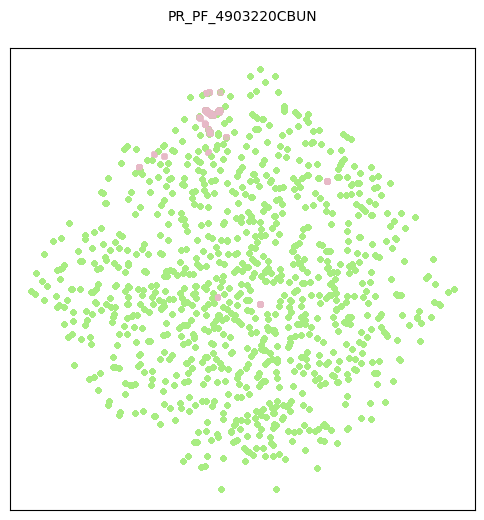

In [71]:
float_cd='PR_PF_4903220' # 6901195   3901684   4903220 6901272
model='CB' #XB CB Lg Knn 
# KL KX KC LX LC XC KLX LXC KLC KXC KLXC
strategy='UN'# Un random C
num=1000 # 100 1000
data= gen() #data
#labels=pre(data)
#print(labels)

#plotlabels(visual(data_Value), labels, float_cd+model+strategy)
plotmp4(data, float_cd+model+strategy,num)

In [8]:
def plotlabels(X_tsne, True_labels, name):
    # design
    maker = ['o', 's']
    colors = ['#A8ED82','#E7B9C7']
    Label_Com = ['good','bad']
    
    #print(X_tsne)
    #print(True_labels)
    True_labels = True_labels.reshape((-1, 1))
    S_data = np.hstack((X_tsne, True_labels))  
    S_data = pd.DataFrame({'x': S_data[:, 0], 'y': S_data[:, 1],'label': S_data[:, 2]})
    #print(S_data)
    #print(S_data.shape)  # [num, 3]
    fig = plt.figure(figsize=(6,6))
    for index in range(2):  # 2 class
        X = S_data.loc[S_data['label'] == index]['x']
        Y = S_data.loc[S_data['label'] == index]['y']
        plt.scatter(X, Y, cmap='brg', s=100, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])

        plt.xticks([])  
        plt.yticks([])  

    plt.title(name, fontsize=10, fontweight='normal', pad=20)
    plt.legend() #
    plt.show(fig)
    plt.savefig('./image/'+name+'cluster.jpg')

/var/folders/sf/0jdp3sqj7l14vc5shrdr13_40000gn/T/ipykernel_43472/1201052792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Label'].apply(lambda x: int(x))


16
           x         y      Date  Latitude  longitude  Pressure  Salinity  \
0   0.118079  0.267199  1.461469  1.501450   1.618655  1.096388 -1.273958   
1   0.106416  0.216867  1.092950  1.324924   0.610308  1.373556 -1.303413   
2   0.053763  0.026961 -0.796337 -0.805936  -1.203585  1.096757 -1.359762   
3   0.239174  0.543912  1.115885  1.102772   0.628842 -0.928316  0.791735   
4   0.699469  0.879353 -0.312388 -0.482270  -0.375978 -0.799217  0.817348   
..       ...       ...       ...       ...        ...       ...       ...   
95  0.266255  0.620916  0.309660  0.663916  -0.036335 -0.836234  1.009446   
96  0.112124  0.073064 -0.496694 -0.833291  -0.445071  2.478359 -1.450688   
97  0.118239  0.009370 -0.611888 -1.000039  -0.644932  0.451997 -1.122841   
98  0.189309  0.503583  1.069799  1.287471   0.579709 -0.615236  0.631653   
99  0.253857  0.494079  1.369305  1.038444   1.344158 -0.837707  0.755876   

    Temperature  
0     -1.310470  
1     -1.406181  
2     -1.350652  


/var/folders/sf/0jdp3sqj7l14vc5shrdr13_40000gn/T/ipykernel_43472/1199661353.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, Y, cmap='brg', s=100, marker=maker[index], c=colors[index], edgecolors=colors[index], alpha=0.65,label= Label_Com[index])


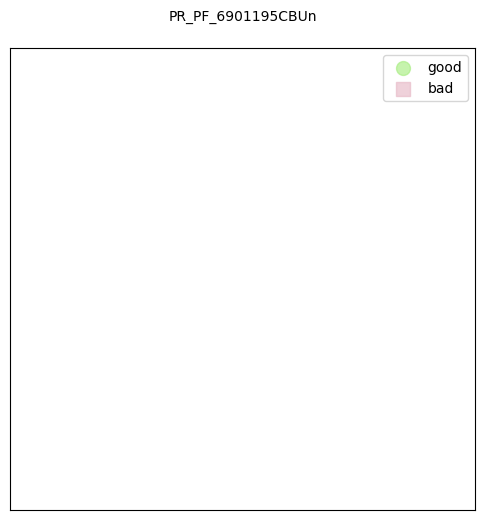

<Figure size 640x480 with 0 Axes>

In [11]:
float_cd='PR_PF_6901195' # 6901195   3901684   4903220
model='CB' #XB CB Lg Knn 
# KL KX KC LX LC XC KLX LXC KLC KXC KLXC
strategy='Un'# Un random C
num=100 # 100 1000
data_source="./query/"+strategy+"_"+model+"_"+float_cd+".csv"
data= pd.read_csv(data_source,index_col=0)
data_Value=data.iloc[:num,:6]
labels=pre(data.iloc[:num,:])
plotlabels(visual(data_Value), labels, float_cd+model+strategy)